# Single Variable Analysis
---
### Notebook for Single Variable Analysis in all three processed datasets

Creation: 07.02.2021

## Required Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Importing Processed Datasets
---

In [2]:
leeds_accidents = pd.read_csv('../data/processed/accidents_processed.csv')
leeds_vehicles = pd.read_csv('../data/processed/vehicles_processed.csv')
leeds_casualties = pd.read_csv('../data/processed/casualties_processed.csv')

In [3]:
xls = pd.ExcelFile('../data/references/variable_lookup.xls')

# read in excel data into python dict of dicts
excel_dict = {i: xls.parse(xls.sheet_names[i]).to_dict() for i in range(len(xls.sheet_names))}

# create convenient lookup dictionary for all excel sheets
variable_lookup = {}
for x in range(len(excel_dict)):
    variable_lookup[x] = {}
    if x > 1:
        for i in range(len(excel_dict[x]['code'])):
            variable_lookup[x][excel_dict[x]['code'][i]] = excel_dict[x]['label'][i]

In [4]:
variable_lookup[8]

{1: 'Roundabout',
 2: 'One way street',
 3: 'Dual carriageway',
 6: 'Single carriageway',
 7: 'Slip road',
 9: 'Unknown',
 12: 'One way street/Slip road',
 -1: 'Data missing or out of range'}

## Overview 
---
For each of the datasets, we want to get a first good impression of its size and the information it stores. To gain this information, we print out each of the datasets, and get a summary of each of the columns and the uniques.

### Accidents
---

In [5]:
leeds_accidents.shape # prints out the number of columns and rows

(1451, 32)

In [6]:
leeds_accidents # prints out an overview of the dataframe (and the number of rows and columns)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019131901350,443576.0,438198.0,-1.339288,53.838231,13,2,4,1,27/09/2019,...,0,0,1,2,2,0,0,2,1,E01011309
1,20191358F1730,436147.0,434957.0,-1.452556,53.809670,13,3,2,7,15/08/2019,...,0,0,1,1,1,0,0,1,2,E01011666
2,2019136111190,435904.0,425850.0,-1.457300,53.727837,13,3,2,1,01/01/2019,...,0,0,1,1,1,0,0,2,1,E01011636
3,2019136111674,423194.0,438111.0,-1.649019,53.838752,13,3,1,1,01/01/2019,...,0,0,1,1,1,0,0,1,1,E01011461
4,2019136111836,429149.0,431736.0,-1.559127,53.781158,13,2,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01011366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2019136CT0238,430040.0,434040.0,-1.545382,53.801815,13,2,1,1,29/12/2019,...,0,0,4,1,1,0,0,1,1,E01033010
1447,2019136CU0181,442094.0,434619.0,-1.362295,53.806186,13,3,1,1,30/12/2019,...,0,0,4,4,2,0,0,2,1,E01011297
1448,2019136CU0363,423019.0,437653.0,-1.651713,53.834643,13,2,1,1,30/12/2019,...,0,0,1,1,4,7,0,1,1,E01011452
1449,2019136CV0723,436853.0,442515.0,-1.440932,53.877548,13,2,2,1,31/12/2019,...,0,0,1,1,1,0,0,2,1,E01011713


In [7]:
leeds_accidents.nunique() # prints out the column names and the corresponding number of unique values 

Accident_Index                                 1451
Location_Easting_OSGR                          1353
Location_Northing_OSGR                         1319
Longitude                                      1407
Latitude                                       1404
Police_Force                                      1
Accident_Severity                                 3
Number_of_Vehicles                                6
Number_of_Casualties                              9
Date                                            348
Day_of_Week                                       7
Time                                             25
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    6
1st_Road_Number                                  38
Road_Type                                         6
Speed_limit                                       6
Junction_Detail                                   9
Junction_Con

We see, that the main dataset 'accidents_processed.csv' stores all recorded accidents in 2019 in Leeds. It consist of 1451 columns (which leads to 1450 recorded accidents) and has 32 columns providing more detailed information about the accident. The different variables and the number of its unique values can be studied in the output of the above cell. We see, that we can differentiate the attributes as follows:
- Categorical Attributes (Most of the columns are categorical)
- Geographical Attributes (There are several measures of the location of the accident)
- Time Attribute (Each accident specifies a date and time)

### Vehicles
---

In [8]:
leeds_vehicles.shape # prints out the number of columns and rows

(2688, 23)

In [9]:
leeds_vehicles # prints out an overview of the dataframe (and the number of rows and columns)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019131901350,1,21,1,11,0,0,0,0,0,...,1,1,39,7,12419,2,3,1,1,1
1,2019131901350,2,21,0,4,0,0,0,0,0,...,1,1,56,9,6374,2,5,2,1,2
2,2019131901350,3,21,1,4,0,0,0,0,0,...,1,1,40,7,10837,2,2,4,1,4
3,2019131901350,4,21,1,4,0,0,0,0,0,...,1,1,35,6,-1,-1,-1,-1,-1,-1
4,20191358F1730,1,9,0,18,0,0,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,2019136CV0723,1,9,0,18,0,0,0,0,0,...,6,1,72,10,1968,2,4,10,1,10
2684,2019136CV0723,2,1,0,18,0,0,0,0,0,...,6,1,59,9,-1,-1,-1,10,1,10
2685,2019136CV1518,1,9,0,4,0,0,0,0,0,...,6,3,-1,-1,1598,2,7,7,1,7
2686,2019136CV1518,2,9,0,4,0,0,0,0,0,...,6,1,41,7,2183,2,7,3,1,3


In [10]:
leeds_vehicles.nunique() # prints out the column names and the corresponding number of unique values 

Accident_Index                      1451
Vehicle_Reference                      6
Vehicle_Type                          17
Towing_and_Articulation                5
Vehicle_Manoeuvre                     18
Vehicle_Location-Restricted_Lane       7
Junction_Location                      9
Skidding_and_Overturning               5
Hit_Object_in_Carriageway              9
Vehicle_Leaving_Carriageway            9
Hit_Object_off_Carriageway            11
1st_Point_of_Impact                    5
Was_Vehicle_Left_Hand_Drive?           2
Journey_Purpose_of_Driver              5
Sex_of_Driver                          3
Age_of_Driver                         84
Age_Band_of_Driver                    11
Engine_Capacity_(CC)                 229
Propulsion_Code                        6
Age_of_Vehicle                        30
Driver_IMD_Decile                     11
Driver_Home_Area_Type                  4
Vehicle_IMD_Decile                    11
dtype: int64

We see, that the side dataset 'vehicles_processed.csv' provides more detailed information about all vehicles involved in each of the accidents. It consist of 2688 columns (which leads to 2688 records on involved vehicles) and has 23 columns providing more detailed information about the vehicle. The different variables and the number of its unique values can be studied in the output of the above cell. We see, that we can differentiate the attributes as follows:
- Linking Attributes (Accident Indexes link the vehicles to the accidents dataset and the vehicle references the casualties)
- Categorical Attributes (Most of the columns are categorical)

### Casualties
---

In [11]:
leeds_casualties.shape # prints out the number of columns and rows

(1908, 16)

In [12]:
leeds_casualties # prints out an overview of the dataframe (and the number of rows and columns)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019131901350,1,1,1,1,39,7,2,0,0,0,0,0,21,1,1
1,20191358F1730,2,1,2,2,6,2,3,0,0,0,4,0,11,1,1
2,20191358F1730,2,2,2,1,9,2,3,0,0,0,4,0,11,1,1
3,20191358F1730,2,3,2,2,39,7,3,0,0,0,4,0,11,1,2
4,20191358F1730,2,4,2,1,5,1,3,0,0,0,4,0,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,2019136CU0181,1,1,1,1,27,6,3,0,0,0,0,0,9,2,9
1904,2019136CU0363,1,1,1,1,36,7,2,0,0,0,0,0,5,1,3
1905,2019136CV0723,2,1,1,1,59,9,2,0,0,0,0,0,1,1,10
1906,2019136CV1518,2,1,1,1,41,7,3,0,0,0,0,0,9,1,3


In [13]:
leeds_casualties.nunique() # prints out the column names and the corresponding number of unique values 

Accident_Index                        1451
Vehicle_Reference                        5
Casualty_Reference                      13
Casualty_Class                           3
Sex_of_Casualty                          2
Age_of_Casualty                         92
Age_Band_of_Casualty                    11
Casualty_Severity                        3
Pedestrian_Location                      9
Pedestrian_Movement                     10
Car_Passenger                            3
Bus_or_Coach_Passenger                   5
Pedestrian_Road_Maintenance_Worker       1
Casualty_Type                           18
Casualty_Home_Area_Type                  4
Casualty_IMD_Decile                     11
dtype: int64

We see, that the side dataset 'casualties_processed.csv' provides more detailed information about the casualties of all lethal accidents. It consist of 1908 columns (which leads to 1907 records on casualties) and has 16 columns providing more detailed information about the vehicle. The different variables and the number of its unique values can be studied in the output of the above cell. We see, that we can differentiate the attributes as follows:
- Linking Attributes (Accident Indexes link the vehicles to the accidents dataset and the vehicle references the casualties)
- Categorical Attributes (Most of the columns are categorical)

## Lookup and Variable Inspection
---

To efficiently analyse and plot singular attributes in the datasets, we need to keep track...
- ...of the column index of the column
- ...of the type of the variable (numerical, categorical)
- ...of the variable look-up for categorical data (those are taken from 'data/references/variable\ lookup.xls')

We therefore create a lookup dictionary for each of the datasets for a code efficient analysis.

### Accidents
---

In [17]:
accidents_categorical_columns = [5, 6, 10, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# dictionary to keep track of relevant data in the vehicles dataset
accidents_lookup = {
    i: {'Name': list(leeds_accidents)[i], 
        'Type': 'Categorical' if i in accidents_categorical_columns else 'Numerical'}
    for i in range(leeds_accidents.shape[1])
}

categorical_counter = 0
for column in accidents_lookup.values():
    if column['Type'] == 'Categorical':
        try: 
            column['Map'] = variable_lookup[2+categorical_counter]
        except: column['Map'] = None
        categorical_counter += 1
    else: column['Map'] = None

### Vehicles
---

In [18]:
vehicles_categorical_columns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18]

# dictionary to keep track of relevant data in the vehicles dataset
vehicles_lookup = {
    i: {'Name': list(leeds_vehicles)[i], 
        'Type': 'Categorical' if i in vehicles_categorical_columns else 'Numerical'}
    for i in range(leeds_vehicles.shape[1])
}

categorical_counter = 0
for column in vehicles_lookup.values():
    if column['Type'] == 'Categorical':
        column['Map'] = variable_lookup[22+categorical_counter]
        categorical_counter += 1
    else: column['Map'] = None

### Casualties
---

In [20]:
casualties_categorical_columns = [3, 4, 5, 7, 8, 9, 10, 11, 12]
# dictionary to keep track of relevant data in the casualties dataset
casualties_lookup = {
    i: {'Name': list(leeds_casualties)[i], 
        'Type': 'Categorical' if i in casualties_categorical_columns else 'Numerical'}
    for i in range(leeds_casualties.shape[1])
}

categorical_counter = 0
for column in casualties_lookup.values():
    if column['Type'] == 'Categorical':
        column['Map'] = variable_lookup[37+categorical_counter]
        categorical_counter += 1
    else: column['Map'] = None

## Single Variable Analysis
---

In [24]:
def get_uniques_and_counts(categorical_data):
    uniques, counts = np.unique(categorical_data, return_counts=True)

    return uniques, counts

In [25]:
def compute_numerical_summary(lookup, data): #
    for column in range(len(lookup)):
        uniques, counts = get_uniques_and_counts(data[lookup[column]["Name"]])
        lookup[column]["No_Uniques"] = len(uniques) # get the number of uniques for each variable
            
        if lookup[column]["Type"] == "Categorical": # get the counts for each uniques for all categorical attributes
            if len(uniques) < 100:
                lookup[column]["Uniques"] = {uniques[i]: counts[i] for i in range(len(uniques))}

### Accidents
---

In [26]:
compute_numerical_summary(accidents_lookup, leeds_accidents)

### Vehicles
---

In [27]:
compute_numerical_summary(vehicles_lookup, leeds_vehicles)

### Casualties
---

In [28]:
compute_numerical_summary(casualties_lookup, leeds_casualties)

## Saving Numerical Report
---

In [29]:
def save_numerical_report(lookup, name):
    lookup_dataframe = pd.DataFrame(lookup)

    try: os.makedirs('../reports/numerical_summaries')
    except: None
    
    lookup_dataframe.to_csv(f'../reports/numerical_summaries/numerical_summary_{name}.csv')

In [30]:
save_numerical_report(accidents_lookup, 'accidents')
save_numerical_report(vehicles_lookup, 'vehicles')
save_numerical_report(casualties_lookup, 'casualties')

## Visualisation
---
In this section, we are visualising the results of the single variable analysis in all three datasets - both within the Jupyter and per export into 'reports/figures' for later use.

In [17]:
def visualise_summary(data):
    # get the number of categorical data
    count = sum([1 for i in range(len(data)) if data[i]['Type'] == 'Categorical'])
    print(count)
    
    fig, axes = plt.subplots(count, figsize=(4*count, 3))

    axes_index = 0
    for i in range(len(data)):
        if data[i]['Type'] == 'Categorical' and i!=0:
            axes_index += 1

            axes[axes_index].bar(data[i]['Uniques'].keys(), data[i]['Uniques'].values())

            axes[axes_index].set_title(data[i]['Name'])
            #axes[i].set_xticks(data[i]['No_Uniques'])
            #axes[i].set_xticklabel(data[i]['Map'].values())

24


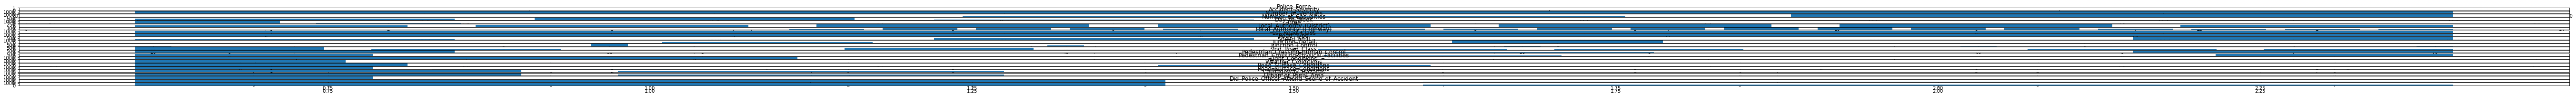

In [18]:
visualise_summary(accidents_lookup)

In [141]:
def visualise_singular(data, keep_missing_values=True):
    # create figure and axes (with padding for better exporting)
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_axes([.1,.1,.8,.8])
    
    # plot with or without missing values (depending on function arguments)
    if keep_missing_values:
        x = list(data['Uniques'].keys())
        y = list(data['Uniques'].values())
    else: 
        x = list(data['Uniques'].keys[1:])
        y = list(data['Uniques'].values[1:])

    print(x, y)
    ax.barh(x, y, align='center')

    # set title
    if keep_missing_values:
        title = f"Distribution: {data['Name'].replace('_', ' ')} (with missing values)"
    else: title = f"Distribution: {data['Name'].replace('_', ' ')} (without missing values)"

    ax.set_title(title, fontweight='bold')

    # format axis-labels
    ax.set_xlabel('Number of Accidents')
    ax.set_yticks(list(data['Uniques'].keys()))
    ax.tick_params(axis='y', which='major', pad=10)
    try: 
        ax.set_yticklabels([data['Map'][i] for i in data['Uniques'].keys()]) # use lookup from xls 
    except: None # account for variables that do not have lookup mapping

    for x_cord, y_cord in zip(x,y):
        ax.text(y_cord, x_cord, f'{y_cord} ({100*round(y_cord/sum(y), 3)}%)' , color='black', fontweight='bold')

    return fig

[1, 2, 3, 4, 5, 6, 7] [135, 193, 219, 232, 222, 258, 192]


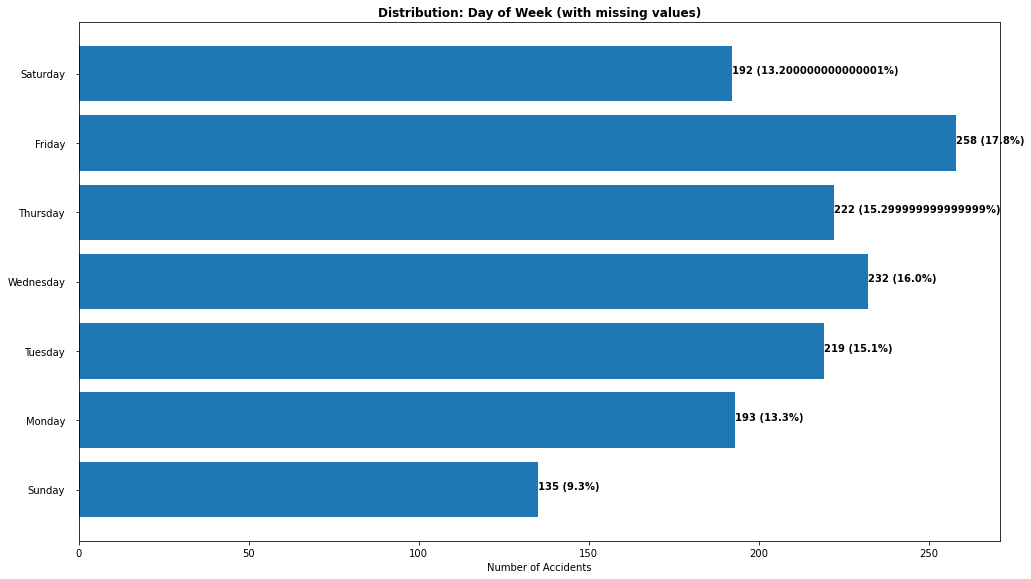

In [142]:
fig = visualise_singular(accidents_lookup[10], keep_missing_values=True)

## Saving Figures
---

In [93]:
def save_figure(figure, name, dataset, keep_missing_values=True):
    try:
        if keep_missing_values: 
            os.makedirs(f'../reports/figures/{dataset}/with_missing_values')
        else: 
            os.makedirs(f'../reports/figures/{dataset}/no_missing_values')
    except: None

    if keep_missing_values:
        figure.savefig(f'../reports/figures/{dataset}/with_missing_values/{name}.pdf')
    else: 
        figure.savefig(f'../reports/figures/{dataset}/no_missing_values/{name}.pdf')

In [106]:
def save_all(data, missing_values):
    for column in range(len(data)):
        if data[column]["Type"] == "Categorical" and column != 0:
            fig = visualise_singular(data[column], keep_missing_values=missing_values)

            save_figure(fig, data[column]['Name'], 'accidents', missing_values)

### Accidents
--- 

In [ ]:
save_all(accidents_lookup, missing_values=True)
save_all(accidents_lookup, missing_values=False)

### Vehicles
---

### Casualties
---